# **OASIS INFO BYTE TASK**

## *Data Science Internship*

## **Author: FASIH AHMED**



### Task 3: *Car Price Prediction with Machine Learning*

## Importing Libraries

In [74]:
#Importing all important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [75]:
warnings.filterwarnings("ignore")

## Loading Data

In [76]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
data = pd.read_csv(url)

## Exploring Data

In [77]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [78]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [79]:
data = data.dropna()

In [80]:
data = data.drop_duplicates()

## Visualizing Data

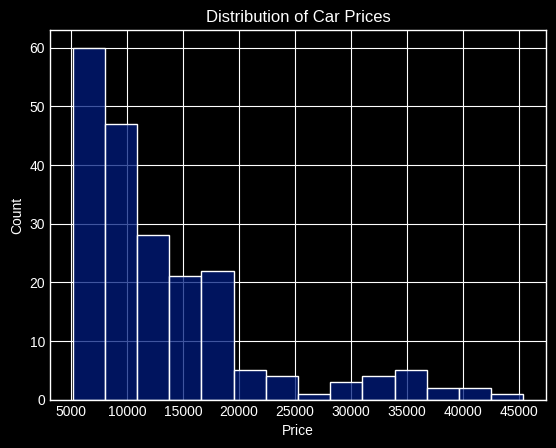

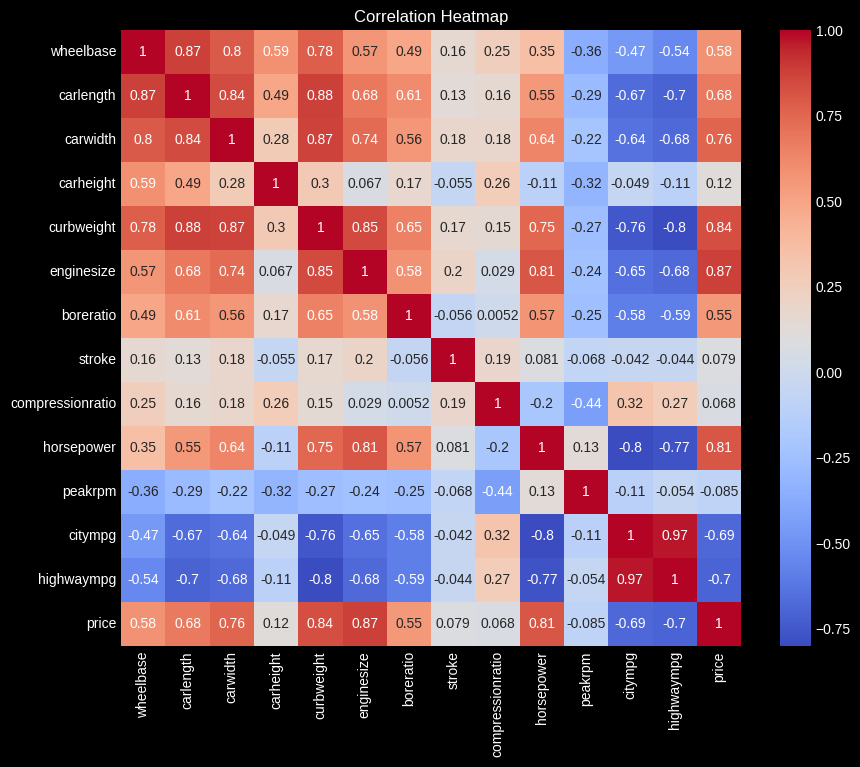

In [81]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of Car Prices', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                    'peakrpm', 'citympg', 'highwaympg', 'price']
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

## Preprocessing Data

In [82]:
feature_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                'citympg', 'highwaympg']

target_col = 'price'
X = data[feature_cols]
y = data[target_col]

In [83]:
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

## Splitting Data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting the Model

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluating the Model

In [86]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3989.535026220401


## Deployment and Prediction

In [87]:
new_car_data = [[3, 'gas', 'std', 'two', 'sedan', 'fwd', 'front', 100.0, 180.0, 68.0, 56.0, 2500, 'ohc', 'four',
                 120, 'mpfi', 3.50, 2.80, 8.5, 110, 5500, 30, 38]]

new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)

new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)

new_car_encoded = new_car_encoded.reindex(columns=X_train.columns, fill_value=0)

predicted_price = model.predict(new_car_encoded)

print("Predicted Price:", predicted_price)

Predicted Price: [12632.09458377]


## **THANK YOU**

